In [1]:
import tensorflow as tf
from tensorflow.python import keras
from sklearn.model_selection import train_test_split
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2023-06-29 00:09:07.162665: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 00:09:08.128644: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def load_data(dataset_path):
    with open(dataset_path,'r') as fp:
        data=json.load(fp)

    inputs=np.array(data['mfcc'])
    targets=np.array(data['labels'])
    mapping=data['mapping']

    return inputs,targets,mapping

In [3]:
inputs,targets,mapping=load_data('data_project.json')

In [4]:
mapping

['Bhajan', 'Romantic', 'Bhojpuri', 'Rap']

In [4]:
targets

array([0, 0, 0, ..., 3, 3, 3])

In [5]:
#unique targets
NUM_CLASSES=len(np.unique(targets))
NUM_CLASSES

4

In [6]:
input_train,input_test,target_train,target_test=train_test_split(inputs,targets,test_size=0.3)

In [7]:
inputs.shape

(3234, 259, 13)

In [8]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES,activation='softmax')
])

2023-06-28 23:53:21.424162: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-28 23:53:21.472473: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-28 23:53:21.472715: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3367)              0         
                                                                 
 dense (Dense)               (None, 512)               1724416   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 1,872,452
Trainable params: 1,872,452
Non-trainable params: 0
_________________________________________________________________


In [11]:
history=model.fit(input_train,target_train,validation_data=(input_test,target_test),epochs=100,batch_size=32)

2023-06-28 23:53:22.675440: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30478084 exceeds 10% of free system memory.
2023-06-28 23:53:22.754845: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30478084 exceeds 10% of free system memory.


Epoch 1/100


2023-06-28 23:53:23.775390: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x1ff0b760 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-28 23:53:23.775461: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-06-28 23:53:23.806230: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-28 23:53:24.092990: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-06-28 23:53:24.365995: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


69/71 [============================>.] - ETA: 0s - loss: 13.1096 - accuracy: 0.5249

2023-06-28 23:53:25.385566: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 13077428 exceeds 10% of free system memory.
2023-06-28 23:53:25.429583: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 13077428 exceeds 10% of free system memory.


71/71 [==============================] - 3s 6ms/step - loss: 12.8977 - accuracy: 0.5259 - val_loss: 4.4309 - val_accuracy: 0.5438
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 3.1820 - accuracy: 0.6315 - val_loss: 2.8939 - val_accuracy: 0.5860
Epoch 3/100
71/71 [==============================] - 0s 3ms/step - loss: 1.7234 - accuracy: 0.6832 - val_loss: 2.4072 - val_accuracy: 0.6210
Epoch 4/100
71/71 [==============================] - 0s 3ms/step - loss: 1.3479 - accuracy: 0.7198 - val_loss: 1.5513 - val_accuracy: 0.6591
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 0.5311 - accuracy: 0.8277 - val_loss: 1.5254 - val_accuracy: 0.6457
Epoch 6/100
71/71 [==============================] - 0s 3ms/step - loss: 0.5336 - accuracy: 0.8361 - val_loss: 1.8929 - val_accuracy: 0.6437
Epoch 7/100
71/71 [==============================] - 0s 3ms/step - loss: 0.5813 - accuracy: 0.8343 - val_loss: 1.4870 - val_accuracy: 0.6787
Epoch 8/100
71/71 [=====

In [12]:
def plot_accuracy_curves(history):
    history_plot=pd.DataFrame(history.history)

    plt.plot(history_plot['accuracy'],label='train_accuracy')
    plt.plot(history_plot['val_accuracy'],label='test_accuracy')
    plt.legend(['train_accuracy','test_accuracy'])
    plt.title("Accuracy curves")
    plt.xlabel("Epochs")

In [13]:
def plot_loss_curves(history):
    history_plot=pd.DataFrame(history.history)

    plt.plot(history_plot['loss'],label='train_loss')
    plt.plot(history_plot['val_loss'],label='test_loss')
    plt.legend(['train_loss','test_loss'])
    plt.title("Loss curves")
    plt.xlabel("Epochs")

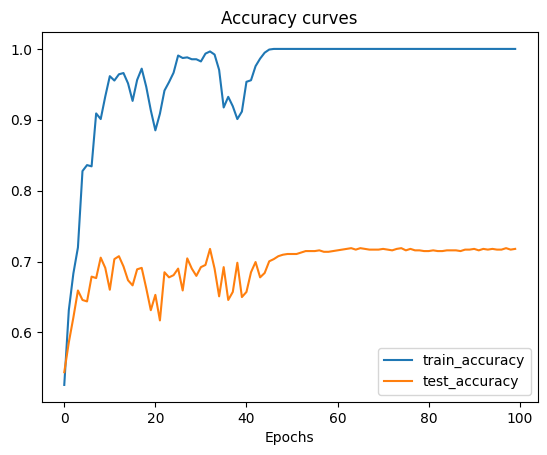

In [14]:
plot_accuracy_curves(history)

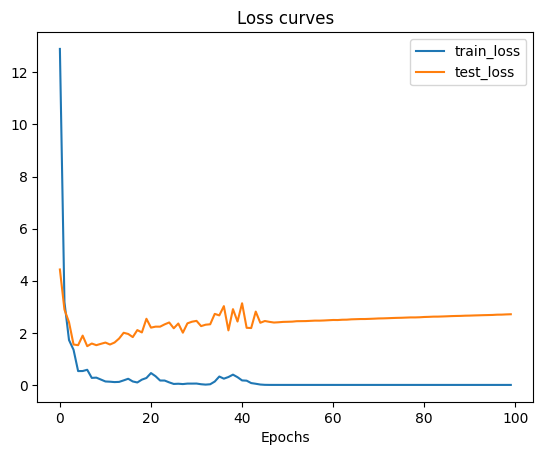

In [15]:
plot_loss_curves(history)

In [16]:
#Reducing neurons, applying dropout and L2 regularization to reduce overfitting

model2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),
    tf.keras.layers.Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(NUM_CLASSES,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history2=model.fit(input_train,target_train,validation_data=(input_test,target_test),epochs=100,batch_size=32)

Epoch 1/100


2023-06-28 23:53:46.242885: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30478084 exceeds 10% of free system memory.


71/71 [==============================] - 1s 4ms/step - loss: 0.3624 - accuracy: 0.9280 - val_loss: 2.5011 - val_accuracy: 0.6869
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 0.1311 - accuracy: 0.9602 - val_loss: 2.9588 - val_accuracy: 0.6787
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 0.3250 - accuracy: 0.9275 - val_loss: 2.3660 - val_accuracy: 0.6468
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 0.1487 - accuracy: 0.9554 - val_loss: 2.6522 - val_accuracy: 0.7013
Epoch 5/100
71/71 [==============================] - 0s 3ms/step - loss: 0.2184 - accuracy: 0.9434 - val_loss: 2.0788 - val_accuracy: 0.6931
Epoch 6/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 0.9810 - val_loss: 2.2772 - val_accuracy: 0.6962
Epoch 7/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9938 - val_loss: 2.2252 - val_accuracy: 0.7096
Epoch 8/100
71/71 [======

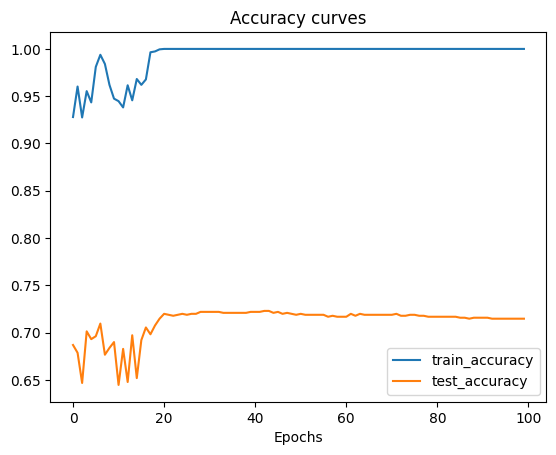

In [17]:
plot_accuracy_curves(history2)

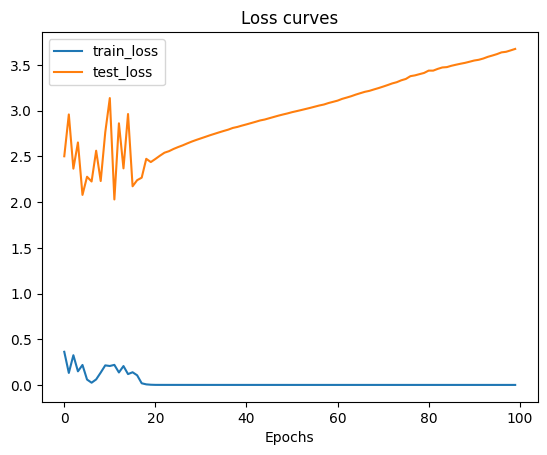

In [18]:
plot_loss_curves(history2)

# Building our CNN Model

In [19]:
def train_test_validation_split(test_size,validation_size):
    X_train,X_test,target_train,y_test=train_test_split(inputs,targets,test_size=test_size)
    X_train,X_validation,target_train,y_validation=train_test_split(X_train,target_train,test_size=validation_size)

    X_train=X_train[...,np.newaxis]
    X_test=X_test[...,np.newaxis]
    X_validation=X_validation[...,np.newaxis]

    return X_train,X_test,X_validation,target_train,y_test,y_validation

In [20]:
X_train,X_test,X_validation,target_train,y_test,y_validation=train_test_validation_split(0.25,0.2)

In [21]:
# from sklearn.preprocessing import MinMaxScaler

# scaler=MinMaxScaler()
# X_train=scaler.fit_transform(X_train.reshape(X_train.shape[0],-1)).reshape(X_train.shape)
# X_test=scaler.transform(X_test.reshape(X_test.shape[0],-1)).reshape(X_test.shape)
# X_validation=scaler.transform(X_validation.reshape(X_validation.shape[0],-1)).reshape(X_validation.shape)

In [22]:
X_train.shape

(1940, 259, 13, 1)

In [23]:
X_train[0][0]

array([[-41.9028244 ],
       [119.84566498],
       [-21.64088821],
       [ -6.12992287],
       [ 17.76195717],
       [  5.96023655],
       [ 10.00424004],
       [ 16.33683395],
       [ -4.32423115],
       [ 32.18058777],
       [  0.56346679],
       [  9.93965149],
       [ -6.82594252]])

In [24]:
def build_model(input_shape):
    model=tf.keras.Sequential([
        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
        tf.keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
        tf.keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(16,(2,2),activation='relu'),
        tf.keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(NUM_CLASSES,activation='softmax')
    ])

    return model

In [25]:
input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])
cnn_model=build_model(input_shape)
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 257, 11, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 129, 6, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 129, 6, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 4, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 2, 32)        0         
 2D)                                                             
                                                      

In [26]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(0.00003),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
cnn_history=cnn_model.fit(X_train,target_train,validation_data=(X_validation,y_validation),epochs=100,batch_size=32)

Epoch 1/100


61/61 [==============================] - 6s 23ms/step - loss: 1.6381 - accuracy: 0.2546 - val_loss: 1.5630 - val_accuracy: 0.1897
Epoch 2/100
61/61 [==============================] - 1s 9ms/step - loss: 1.6544 - accuracy: 0.2593 - val_loss: 1.4633 - val_accuracy: 0.2165
Epoch 3/100
61/61 [==============================] - 0s 7ms/step - loss: 1.5830 - accuracy: 0.2830 - val_loss: 1.4196 - val_accuracy: 0.2392
Epoch 4/100
61/61 [==============================] - 0s 8ms/step - loss: 1.5764 - accuracy: 0.2701 - val_loss: 1.3936 - val_accuracy: 0.2825
Epoch 5/100
61/61 [==============================] - 0s 8ms/step - loss: 1.5542 - accuracy: 0.2722 - val_loss: 1.3749 - val_accuracy: 0.2990
Epoch 6/100
61/61 [==============================] - 0s 7ms/step - loss: 1.5209 - accuracy: 0.2943 - val_loss: 1.3542 - val_accuracy: 0.3196
Epoch 7/100
61/61 [==============================] - 1s 9ms/step - loss: 1.4961 - accuracy: 0.3015 - val_loss: 1.3380 - val_accuracy: 0.3567
Epoch 8/100
61/61 [=====

In [28]:
cnn_model.evaluate(X_test,y_test)

26/26 [==============================] - 0s 8ms/step - loss: 0.6327 - accuracy: 0.7763


[0.6327083706855774, 0.7762669920921326]

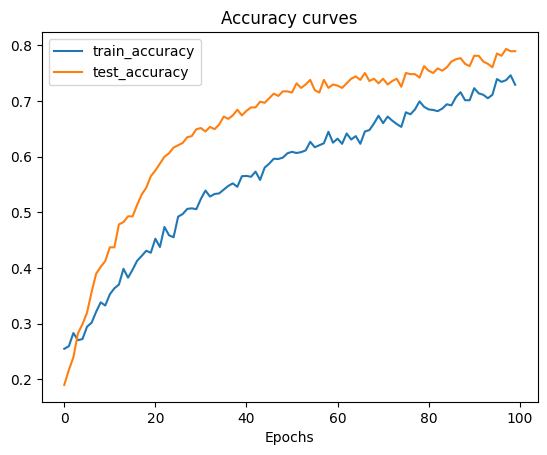

In [29]:
plot_accuracy_curves(cnn_history)

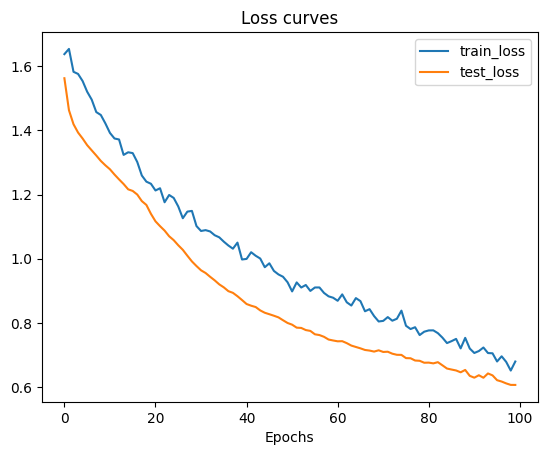

In [30]:
plot_loss_curves(cnn_history)

In [31]:
test_error,test_accuracy=cnn_model.evaluate(X_test,y_test,verbose=1)

26/26 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.7763


In [32]:
cnn_model2=tf.keras.Sequential([
        tf.keras.layers.Conv2D(128,(3,3),activation='leaky_relu',input_shape=input_shape),
        tf.keras.layers.Conv2D(64,(3,3),activation='leaky_relu'),
        tf.keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'),
        tf.keras.layers.BatchNormalization(),

        

        tf.keras.layers.Conv2D(32,(3,3),activation='leaky_relu'),
        tf.keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(16,(2,2),activation='leaky_relu'),
        tf.keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation='leaky_relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(32,activation='leaky_relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(16,activation='leaky_relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(NUM_CLASSES,activation='softmax')
    ])

cnn_model2.compile(optimizer=tf.keras.optimizers.Adam(0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn_model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 257, 11, 128)      1280      
                                                                 
 conv2d_4 (Conv2D)           (None, 255, 9, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 5, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 128, 5, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 126, 3, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 2, 32)       

In [33]:
cnn_history2=cnn_model2.fit(X_train,target_train,validation_data=(X_validation,y_validation),epochs=200,batch_size=32)

Epoch 1/200
61/61 [==============================] - 6s 43ms/step - loss: 2.0333 - accuracy: 0.2588 - val_loss: 1.7103 - val_accuracy: 0.2351
Epoch 2/200
61/61 [==============================] - 2s 25ms/step - loss: 1.9014 - accuracy: 0.2737 - val_loss: 1.5492 - val_accuracy: 0.2536
Epoch 3/200
61/61 [==============================] - 1s 24ms/step - loss: 1.8152 - accuracy: 0.2959 - val_loss: 1.4887 - val_accuracy: 0.2948
Epoch 4/200
61/61 [==============================] - 1s 24ms/step - loss: 1.8095 - accuracy: 0.3088 - val_loss: 1.4408 - val_accuracy: 0.3196
Epoch 5/200
61/61 [==============================] - 1s 24ms/step - loss: 1.7384 - accuracy: 0.3139 - val_loss: 1.3964 - val_accuracy: 0.3361
Epoch 6/200
61/61 [==============================] - 1s 24ms/step - loss: 1.6741 - accuracy: 0.3345 - val_loss: 1.3692 - val_accuracy: 0.3588
Epoch 7/200
61/61 [==============================] - 1s 24ms/step - loss: 1.6351 - accuracy: 0.3448 - val_loss: 1.3379 - val_accuracy: 0.3732
Epoch 

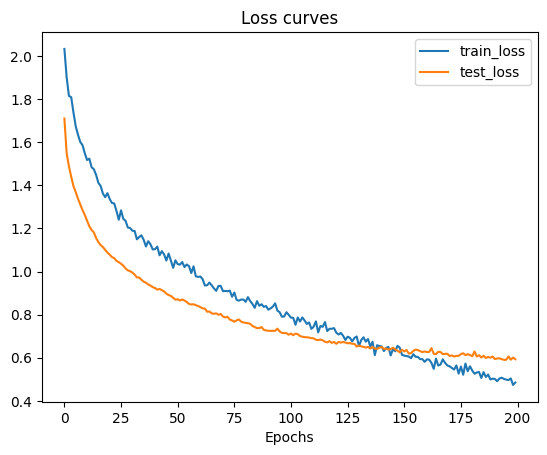

In [34]:
plot_loss_curves(cnn_history2)

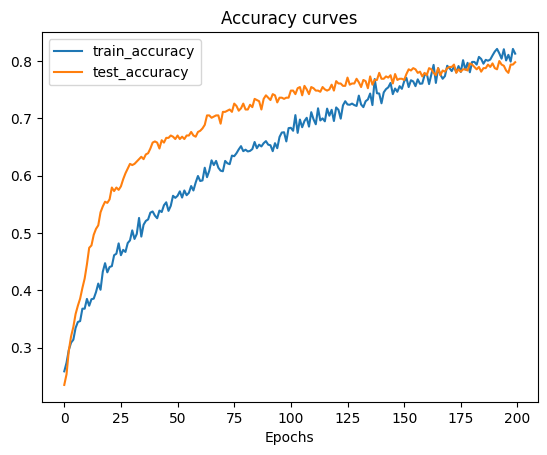

In [35]:
plot_accuracy_curves(cnn_history2)

In [36]:
cnn_model2.evaluate(X_test,y_test)

26/26 [==============================] - 0s 16ms/step - loss: 0.5359 - accuracy: 0.8084


[0.5358978509902954, 0.8084054589271545]

In [ ]:
cnn_model3=tf.keras.Sequential([
        tf.keras.layers.Conv2D(128,(3,3),activation='leaky_relu',input_shape=input_shape),
        tf.keras.layers.Conv2D(64,(3,3),activation='leaky_relu'),
        tf.keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same'),
        tf.keras.layers.BatchNormalization(),

        
        tf.keras.layers.Conv2D(64,(3,3),activation='leaky_relu'),
        tf.keras.layers.Conv2D(32,(3,3),activation='leaky_relu'),
        tf.keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(32,(3,3),activation='leaky_relu'),
        tf.keras.layers.Conv2D(16,(3,3),activation='leaky_relu'),
        tf.keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation='leaky_relu'),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Dense(32,activation='leaky_relu'),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Dense(16,activation='leaky_relu'),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Dense(NUM_CLASSES,activation='softmax')
    ])

cnn_model3.compile(optimizer=tf.keras.optimizers.Adam(0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn_model3.summary()

In [ ]:
cnn_history3=cnn_model3.fit(X_train,target_train,validation_data=(X_validation,y_validation),epochs=500,batch_size=32)

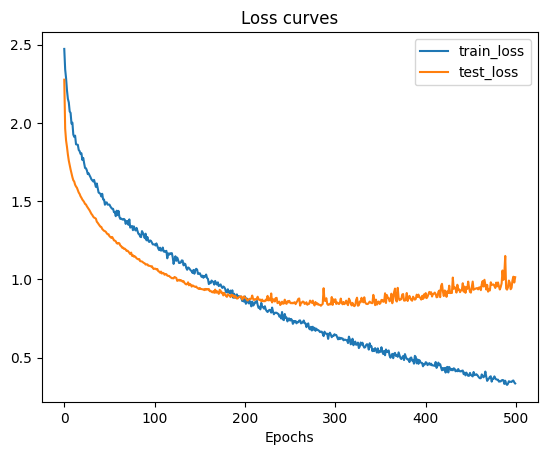

In [ ]:
plot_loss_curves(cnn_history3)

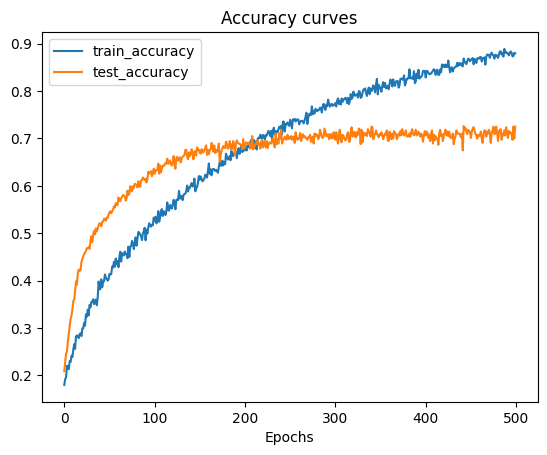

In [ ]:
plot_accuracy_curves(cnn_history3)

In [ ]:
cnn_model3.evaluate(X_test,y_test)

40/40 [==============================] - 0s 9ms/step - loss: 0.9795 - accuracy: 0.7294


[0.9795056581497192, 0.7293650507926941]

In [38]:
cnn_model2.save('cnn_model.h5')

In [39]:
cnn_best=tf.keras.models.load_model('cnn_model.h5')

In [40]:
cnn_best.evaluate(X_test,y_test)

26/26 [==============================] - 0s 9ms/step - loss: 0.5359 - accuracy: 0.8084


[0.5358978509902954, 0.8084054589271545]

In [41]:
y_pred=cnn_best.predict(X_test)
ypred_labelled=y_pred.argmax(axis=1)

26/26 [==============================] - 0s 9ms/step


In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test,y_pred,figsize=(10,10)):
  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)
  

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

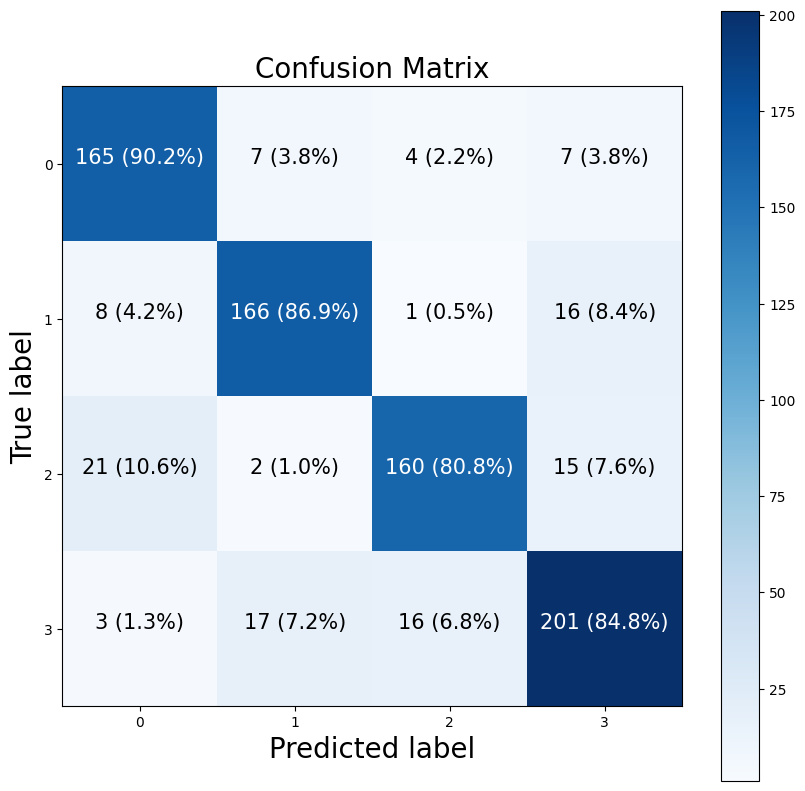

In [ ]:
plot_confusion_matrix(y_test,ypred_labelled)